# [Introduction to Numerical Computing with NumPy](https://www.youtube.com/watch?v=ZB7BZMhfPgk&list=PLYx7XA2nY5GcDQblpQ_M1V3PQPoLWiDAC&index=4)


In [1]:
a = [1, 2, 3, 4, 5]
b = [10, 11, 12, 13, 14]

a + b

[1, 2, 3, 4, 5, 10, 11, 12, 13, 14]

In [2]:
result = []
for first, second in zip(a, b):
    result.append(first + second)

result

[11, 13, 15, 17, 19]

cumbersome over a big array

In [3]:
import numpy as np

# creaet an array 
a = np.array([1, 2, 3, 4])
print(type(a))
print(a.dtype)

<class 'numpy.ndarray'>
int32


In [4]:
f = np.array([1.2, 2.3, 4.5, 5.6])
f.dtype

dtype('float64')

In [5]:
a[0]

1

In [6]:
a[0] = 10
a

array([10,  2,  3,  4])

In [7]:
a[0] = 11.5
a

array([11,  2,  3,  4])

In [8]:
a.ndim

1

In [9]:
a.shape

(4,)

In [10]:
a + f

array([12.2,  4.3,  7.5,  9.6])

In [11]:
a * f


array([13.2,  4.6, 13.5, 22.4])

In [12]:
# raise the array
# vectorized operaation

f ** a

array([  7.43008371,   5.29      ,  91.125     , 983.4496    ])

In [13]:
f * 10

array([12., 23., 45., 56.])

universal functions(ufuncs)

In [14]:
#sin value of every element of a
np.sin(a)

array([-0.99999021,  0.90929743,  0.14112001, -0.7568025 ])

multidimensional; arrays

In [15]:
c = np.array([[0, 1, 2, 3], [10, 11, 12, 13]])
c

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13]])

In [16]:
c.shape

(2, 4)

In [17]:
c.size

8

In [18]:
c.ndim

2

In [19]:
c[1, 3]

13

In [20]:
c[1]

array([10, 11, 12, 13])

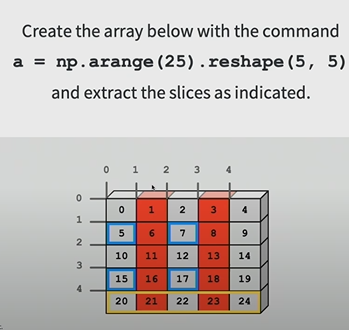

In [21]:
a = np.arange(25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

*red selection*

In [22]:
a[:, ::2]

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14],
       [15, 17, 19],
       [20, 22, 24]])

In [23]:
red = a[:, 1::2]
red

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

*yellow selection*

In [24]:
a[4, :]

array([20, 21, 22, 23, 24])

In [25]:
yellow = a[4, :]
yellow

array([20, 21, 22, 23, 24])

In [26]:
a[4]

array([20, 21, 22, 23, 24])

In [27]:
a[-1]

array([20, 21, 22, 23, 24])

In [28]:
a[-1, :]

array([20, 21, 22, 23, 24])

*blue selection*

In [29]:
a[1::2]

array([[ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19]])

In [30]:
a[1::2, :3:2]

array([[ 5,  7],
       [15, 17]])

In [31]:
a[1::2, :4:2]


array([[ 5,  7],
       [15, 17]])

In [32]:
a[1::2, :-1:2]

array([[ 5,  7],
       [15, 17]])

In [33]:
blue = a[1::2, :3:2]; blue

array([[ 5,  7],
       [15, 17]])

# filter image exercise

Read in the "dc_metro" image and use an averaging filter to "smooth" the image. Use a "5 point stencil" where you average the current pixel with its neighboring pixels::

          0 0 0 0 0 0 0
          0 0 0 x 0 0 0
          0 0 x x x 0 0
          0 0 0 x 0 0 0
          0 0 0 0 0 0 0

Plot the image, the smoothed image, and the difference between the two.

In [34]:
import matplotlib.pyplot as plt

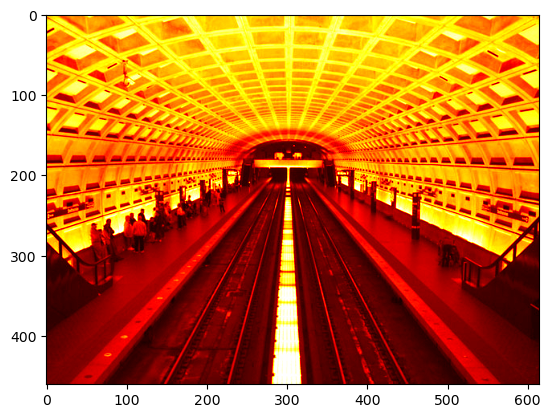

In [38]:
# read image
img = plt.imread("dc_metro.png")

# display iamge 
plt.imshow(img, cmap= plt.cm.hot)

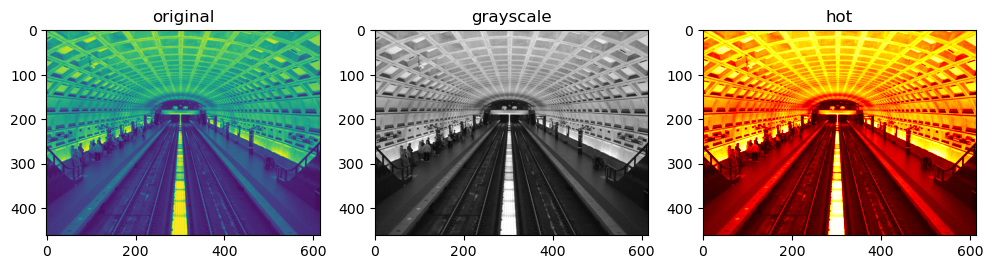

In [39]:
# Use plt.subplot for comparing images
plt.figure(figsize=(12, 6))

# Plot the original
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('original')

# Plot another image
plt.subplot(1,3,2)
plt.imshow(img, cmap='gray')
plt.title('grayscale')

# Plot another image
plt.subplot(1,3,3)
plt.imshow(img, cmap=plt.cm.hot)
plt.title('hot');


Solution 1

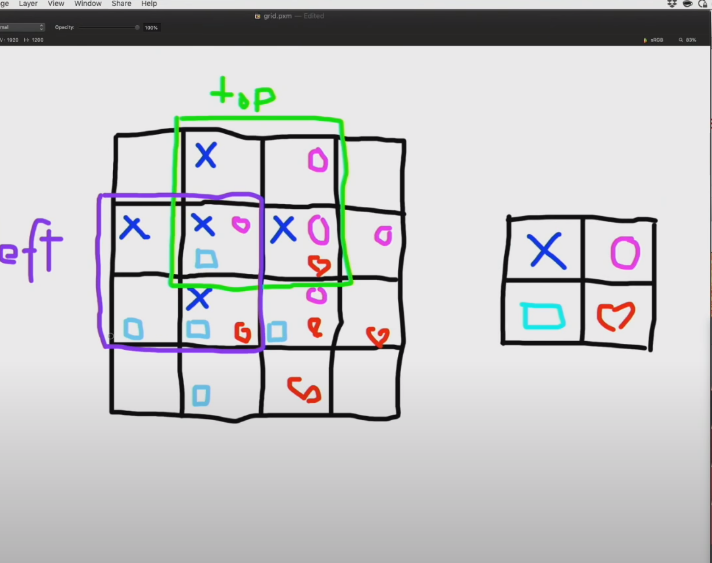

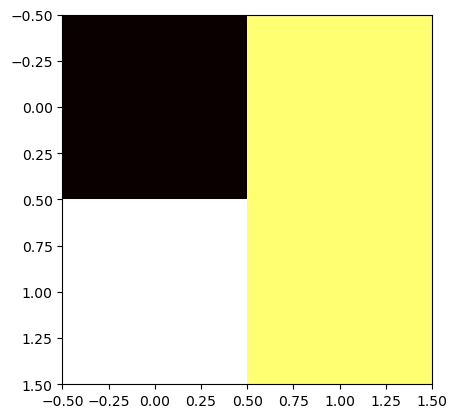

In [43]:
# blur image
top = img[0:2, 1:3]
left = img[1:3, 0:2]

blurred = (top + left)/5
blurred

plt.imshow(blurred, cmap= plt.cm.hot)


In [44]:
# solution 2
# define functions to smooth, one with index slicing another with for loops
# index function
def smooth(img):
    avg_img = (   img[1:-1, 1:-1] # center
                + img[ :-2, 1:-1] # top
                + img[2: , 1:-1] # bottom
                + img[1:-1, :-2] # right   
                ) / 5.0
    return avg_img

# loop function
def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (  img[r+1, c+1]  # center
                              + img[r  , c+1]  # top
                              + img[r+2, c+1]  # bottom
                              + img[r+1, c  ]  # left
                              + img[r+1, c+2]  # right
                             ) / 5.0
    return smoothed

    


Text(0.5, 1.0, 'difference')

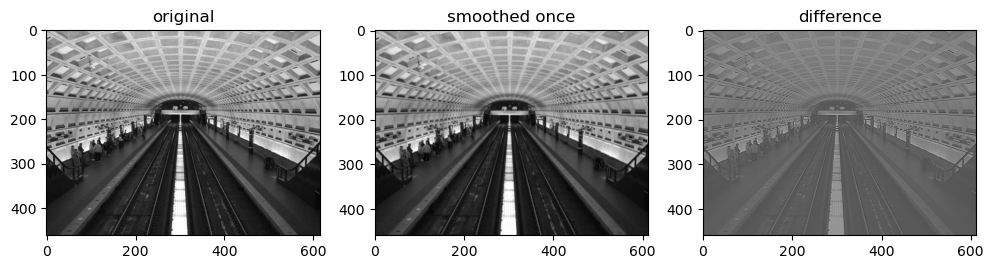

In [45]:
img = plt.imread("dc_metro.png")
avg_img = smooth(img)

plt.figure(figsize= (12, 6))

# Set colormap so that images are plotted in gray scale.
plt.gray()
# Plot the original image first
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("original")

# filtered image
plt.subplot(1, 3, 2)
plt.imshow(avg_img)
plt.title("smoothed once")

# difference between the two
plt.subplot(1, 3, 3)
plt.imshow(img[1:-1, 1:-1] - avg_img)
plt.title("difference")

# Bonus
Re-filter the image by passing the result image through the filter again. Do this 50 times and plot the resulting image.




Text(0.5, 1.0, 'smoothed 50 times')

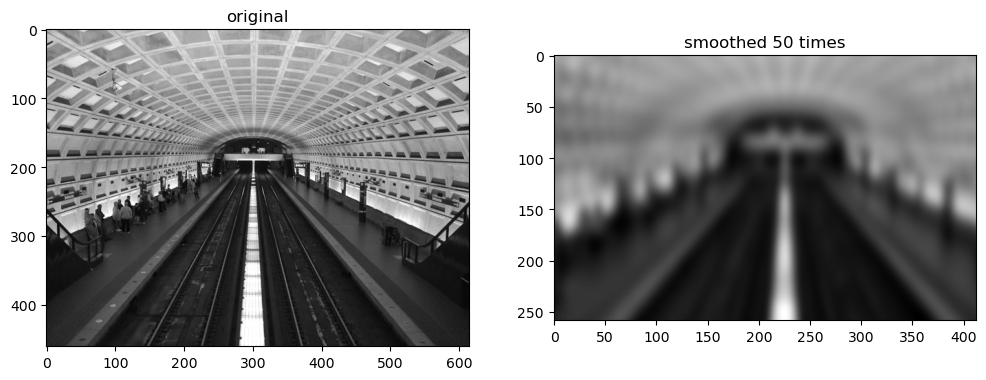

In [47]:
for num in range(50):
    avg_img = smooth(avg_img)


# plot original
plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")

# filtered image
plt.subplot(1, 2, 2)
plt.imshow(avg_img)
plt.title("smoothed 50 times")



In [50]:
# compare performance

%timeit smooth(img)

8.82 ms ± 585 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
%timeit smooth_loop(img)

4.27 s ± 1.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


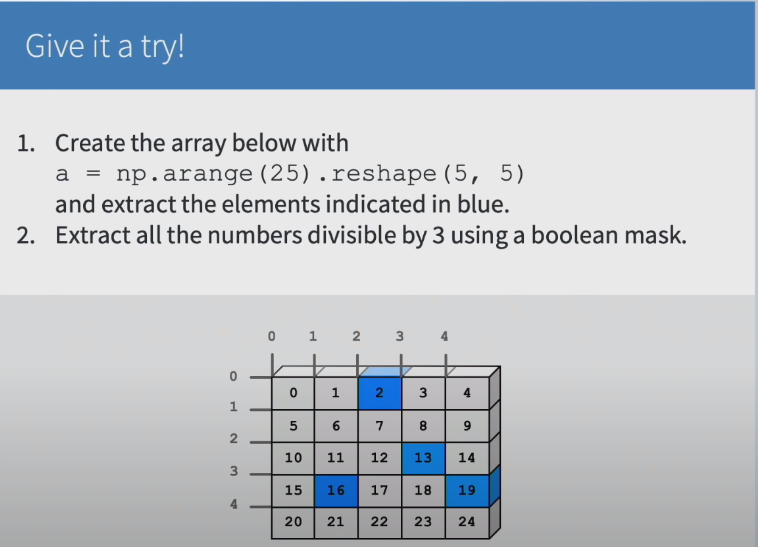

In [52]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [54]:
a[[0], [2]]

array([2])

In [56]:
a[[0, 2], [2, 3]]

array([ 2, 13])

In [57]:
a[[0, 2, 3, 3], [2, 3, 1, -1]]

array([ 2, 13, 16, 19])

In [58]:
a[[0, 2, 3, 3], [2, 3, 1, 4]]

array([ 2, 13, 16, 19])

In [59]:
# numbers divisible by 3
a % 3

array([[0, 1, 2, 0, 1],
       [2, 0, 1, 2, 0],
       [1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1],
       [2, 0, 1, 2, 0]], dtype=int32)

In [62]:
a % 3 == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False],
       [ True, False, False,  True, False],
       [False,  True, False, False,  True]])

In [63]:
a[a % 3 == 0]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

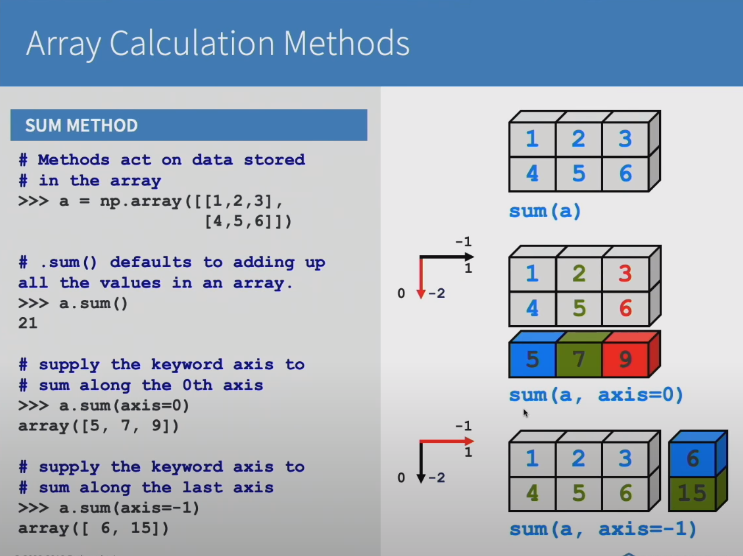

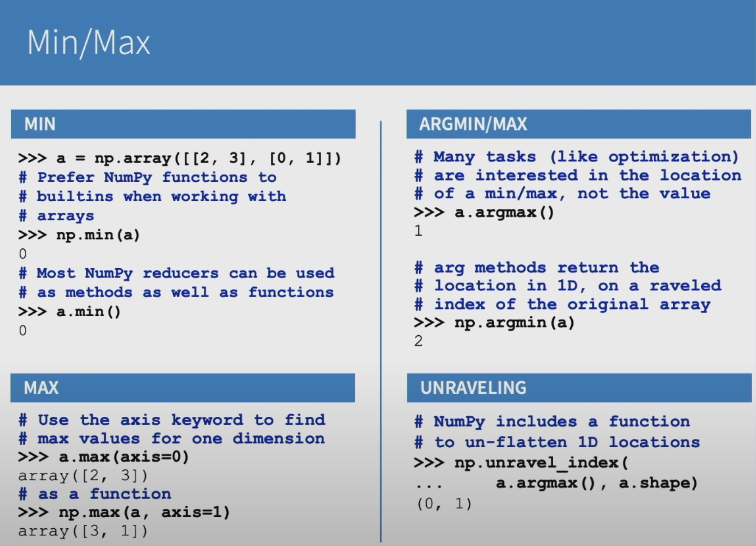